In [3]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import pandas_market_calendars as mcal
from importlib import reload
import sys
import os
import time
from IPython.display import clear_output, display
from tqdm import tqdm
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [4]:
import functions; functions = reload(functions)
from functions import *

In [5]:
apikey = os.getenv('polygon_apikey_1')

In [101]:
stocks = get_stocks(tickers, '2022-10-10')
btc = get_crypto('BTCUSD', '2022-10-10')
df = pd.concat([stocks, btc], axis=0)

In [134]:
df['date'] = pd.to_datetime(df['date'])

In [103]:
df.ticker.unique()

array(['MSTR', 'COIN', 'CLSK', 'BTCUSD'], dtype=object)

In [104]:
coin.date.min()

'2022-10-10'

In [105]:
btc.date.min()

'2022-10-10'

In [135]:
btc = df[df.ticker == 'BTCUSD']
coin = df[df.ticker == 'COIN']
mstr = df[df.ticker == 'MSTR']
clsk = df[df.ticker == 'CLSK']

In [150]:
bla = mstr[mstr.date > '2024-07-21']

In [161]:
mstr.close.loc[:1354] = mstr.close.loc[:1354] / 10

/var/folders/tx/mdlysw1d1xg53xtfs98v2mhm0000gn/T/ipykernel_70347/1761460072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mstr.close.loc[:1354] = mstr.close.loc[:1354] / 10


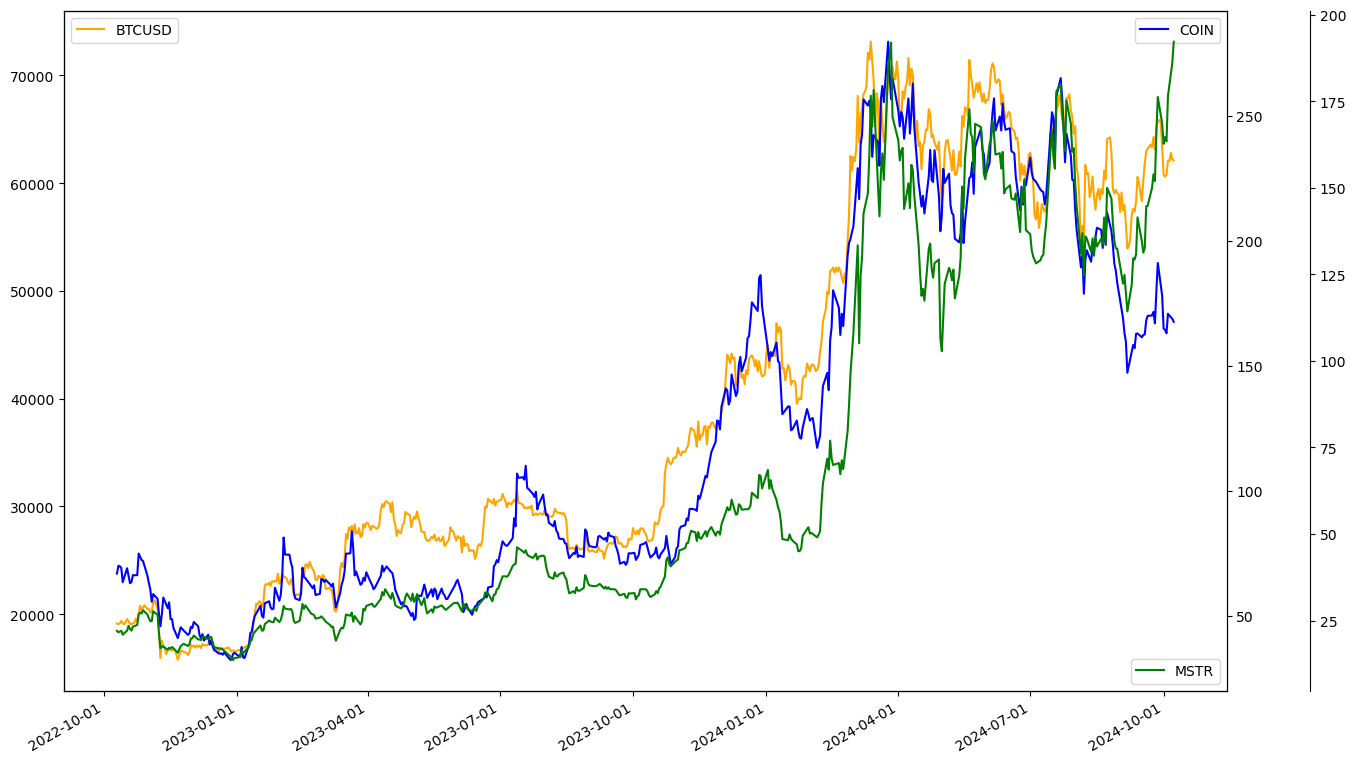

In [163]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.plot(btc['date'], btc['close'], label='BTCUSD', color='orange')

ax2 = ax1.twinx()
ax2.plot(coin['date'], coin['close'], label='COIN', color='blue')

ax3 = ax1.twinx()
ax3.plot(mstr['date'], mstr['close'], label='MSTR', color='green')
ax3.spines['right'].set_position(('outward', 60))

ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower right')

plt.show()

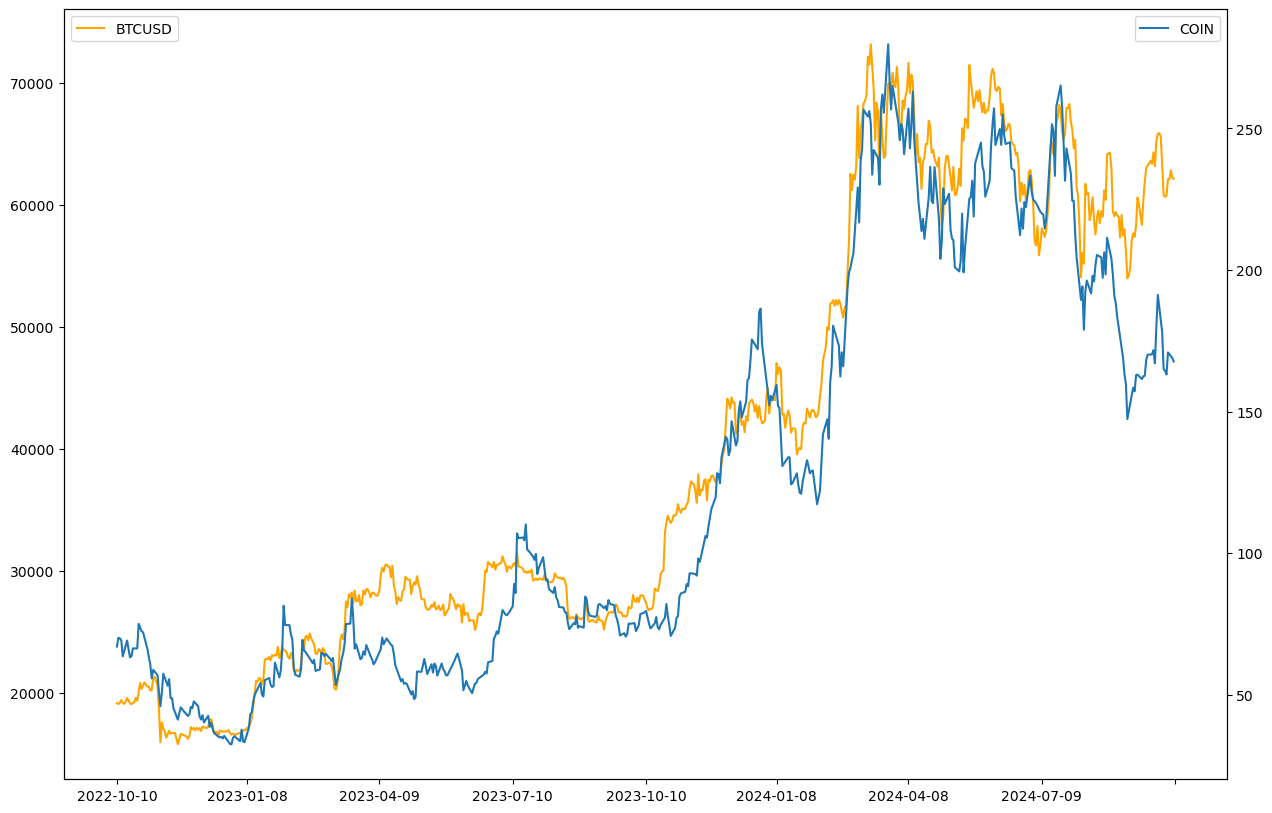

In [115]:
fig, ax1 = plt.subplots(figsize=(15, 10))

ax1.plot(btc.date, btc.close, label='BTCUSD', color='orange')
ax2 = ax1.twinx()
ax2.plot(coin.date, coin.close, label='COIN', color='#1f77b4')
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

In [4]:
# todo
# 1. test function for daily aggregates - none/errors/edge cases/before available
# 2. design pipeline for many jsons to csv
# 3. .db maybe?
# 4. if not, make csv
# 5. update/remake .py files to download and merge missing

In [15]:
baseurl = 'v3/reference/splits'
spliturl = 'https://api.polygon.io/v3/reference/splits?execution_date.lt=2024-06-01&apiKey=3CenRhJBzNqh2_C_5S38pOyt3ozLvQDm'

In [5]:
date = '2020-01-01'
url = f'https://api.polygon.io/v2/aggs/grouped/locale/us/market/stocks/{date}?apiKey={apikey}'

In [50]:
unauth = daily_agg('2018-01-02')
holiday = daily_agg('2020-01-01')
good = daily_agg('2020-06-01')

Attempted to request data past historical entitlements. Please upgrade your plan at https://polygon.io/pricing
No data available for 2020-01-01


In [17]:
mon = daily_agg('2024-06-03')
tue = daily_agg('2024-06-04')
wed = daily_agg('2024-06-05')

In [18]:
alljson = []
for json in [mon, tue, wed]:
    alljson.extend(json)

In [85]:
alldates = get_trading_days()
all = datelist_to_df(alldates)

In [162]:
conn = sqlite3.connect('main.db')